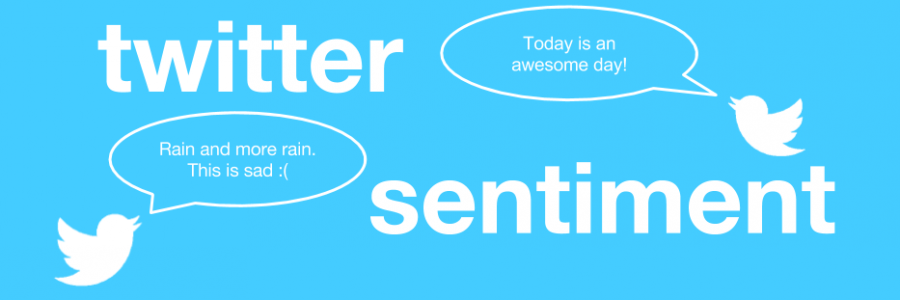

#  **Sentiment Analysis is the process of ‘computationally’ determining whether a piece of writing is positive, negative or neutral. It’s also known as opinion mining, deriving the opinion or attitude of a speaker.**

## **Importing Necessary Library**



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics



## 1-**Data Collection**

In [2]:

df=pd.read_csv("/content/Twitter_Data.csv")

In [3]:
df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [4]:
df.shape

(162980, 2)

In [5]:
df.columns

Index(['clean_text', 'category'], dtype='object')

In [6]:
df.dtypes

clean_text     object
category      float64
dtype: object

In [7]:
df['category'].unique()

array([-1.,  0.,  1., nan])



*   **Negative Sentiment** (-1)

*   **Neutral Sentiment** (0)

*   **Positive Sentiment**(1)







In [8]:
print(df['clean_text'].iloc[0],"\n")
print(df['clean_text'].iloc[1],"\n")
print(df['clean_text'].iloc[2],"\n")
print(df['clean_text'].iloc[3],"\n")
print(df['clean_text'].iloc[1119],"\n")

when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples 

talk all the nonsense and continue all the drama will vote for modi  

what did just say vote for modi  welcome bjp told you rahul the main campaigner for modi think modi should just relax 

asking his supporters prefix chowkidar their names modi did great service now there confusion what read what not now crustal clear what will crass filthy nonsensical see how most abuses are coming from chowkidars 

mam fault lies with people only elect such dim wits they are the one who bring bad name party give vote for modi but his name sometimes elect filth and hurts 



Text(0.5, 1.0, 'Distribution of Category')

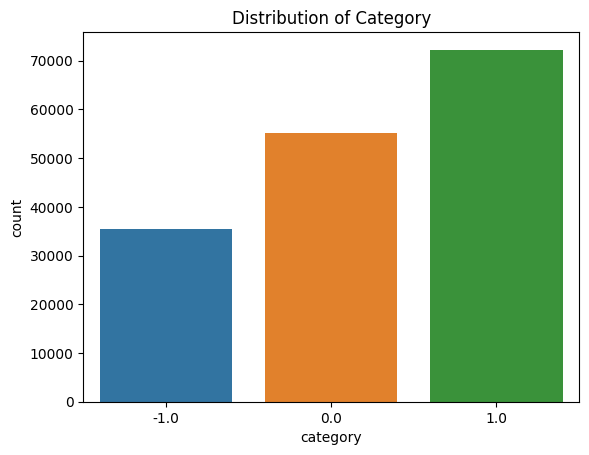

In [9]:
import matplotlib.pyplot as plt
sns.countplot(df,x='category')
plt.title("Distribution of Category")


## 2-**Text Preprocessing**

In [10]:
df.isnull().sum()

clean_text    4
category      7
dtype: int64

In [11]:
df= df.dropna()
df.isnull().sum()

clean_text    0
category      0
dtype: int64

In [12]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [13]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

## **Removing Punctuation, Numbers, and Special Characters**

In [14]:
df['clean_text']=df['clean_text'].str.replace("[^a-zA-Z#]", " ")
df.head()

<ipython-input-14-1036d5dc25b2>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_text']=df['clean_text'].str.replace("[^a-zA-Z#]", " ")
<ipython-input-14-1036d5dc25b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text']=df['clean_text'].str.replace("[^a-zA-Z#]", " ")


,clean_text,category
0,when modi promised minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


# **Tokenization**

### **Tokenization**: Tokenization involves splitting text into individual words or tokens.



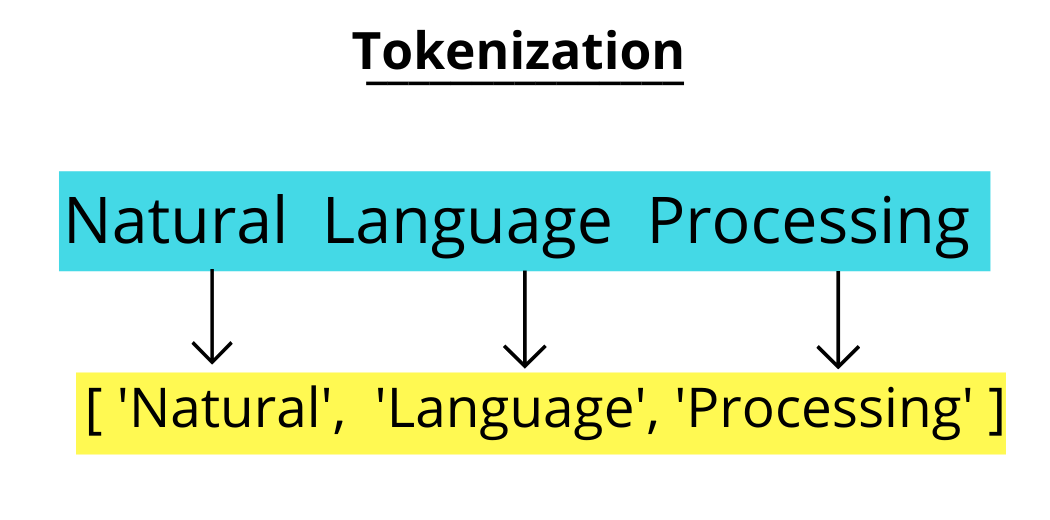

In [15]:
import re
# Function to Tokenize words
def tokenize(text):
    tokens = re.split('\W+', text) #W+ means that either a word character (A-Za-z0-9_) or a dash (-) can go there.
    return tokens

df['clean_text_tokenized']= df['clean_text'].apply(lambda x:tokenize(x.lower()))
#We convert to lower as Python is case-sensitive.

df.head()

<ipython-input-15-30ace5da739e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text_tokenized']= df['clean_text'].apply(lambda x:tokenize(x.lower()))


,clean_text,category,clean_text_tokenized
0,when modi promised minimum government maximum...,-1.0,"[when, modi, promised, minimum, government, ma..."
1,talk all the nonsense and continue all the dra...,0.0,"[talk, all, the, nonsense, and, continue, all,..."
2,what did just say vote for modi welcome bjp t...,1.0,"[what, did, just, say, vote, for, modi, welcom..."
3,asking his supporters prefix chowkidar their n...,1.0,"[asking, his, supporters, prefix, chowkidar, t..."
4,answer who among these the most powerful world...,1.0,"[answer, who, among, these, the, most, powerfu..."


## Remove Stopwords

###  **Stopwords**:Stopwords are common words (e.g., "the," "and," "in") that are often removed from text during preprocessing because they don't carry significant meaning for analysis.

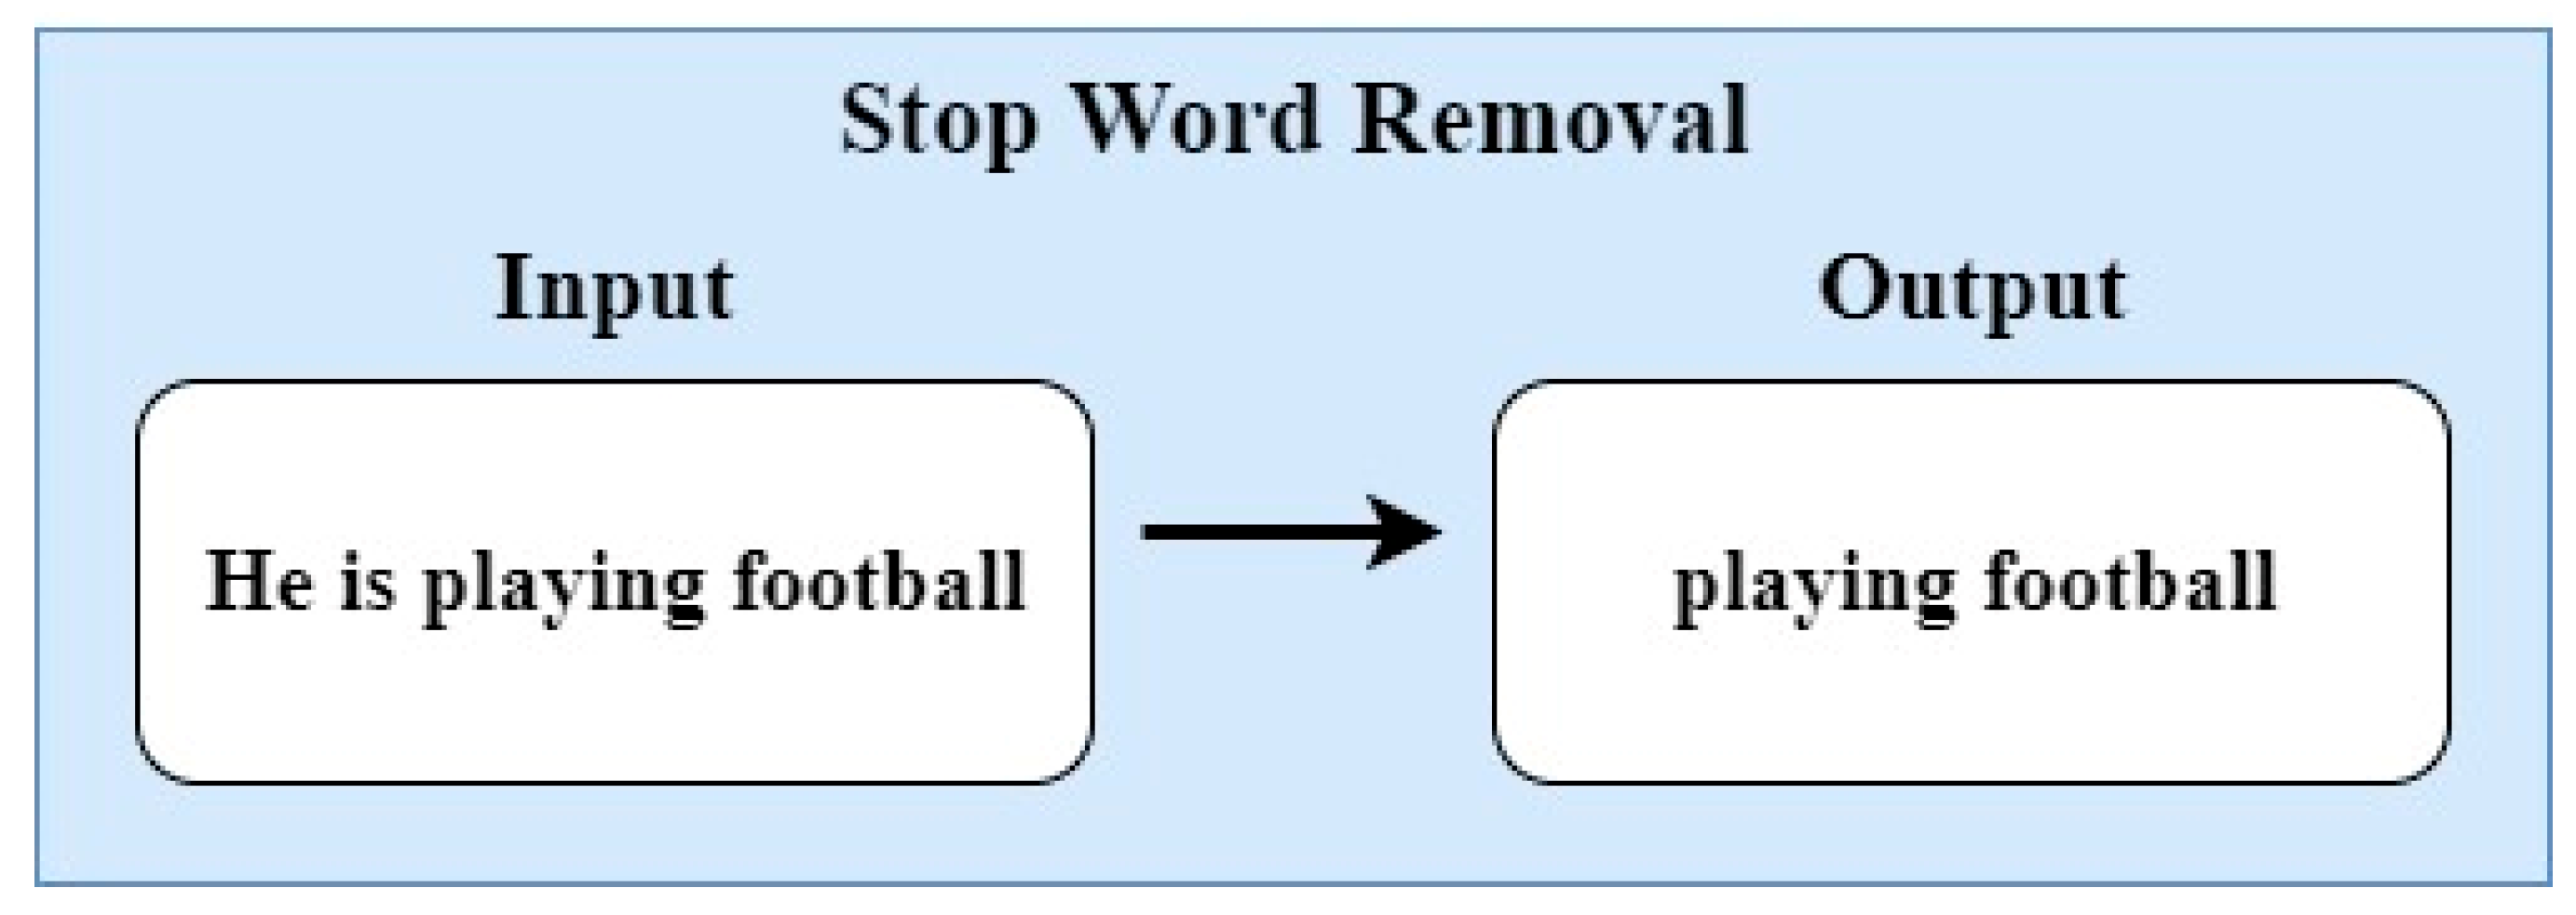

In [16]:
import nltk
nltk.download('stopwords')
stopword=nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
# Function to remove Stopwords
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]# To remove all stopwords
    return text

df['clean_text_nostopword'] = df['clean_text_tokenized'].apply(lambda x: remove_stopwords(x))

df.head()

<ipython-input-17-3583f029817a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text_nostopword'] = df['clean_text_tokenized'].apply(lambda x: remove_stopwords(x))


,clean_text,category,clean_text_tokenized,clean_text_nostopword
0,when modi promised minimum government maximum...,-1.0,"[when, modi, promised, minimum, government, ma...","[modi, promised, minimum, government, maximum,..."
1,talk all the nonsense and continue all the dra...,0.0,"[talk, all, the, nonsense, and, continue, all,...","[talk, nonsense, continue, drama, vote, modi, ]"
2,what did just say vote for modi welcome bjp t...,1.0,"[what, did, just, say, vote, for, modi, welcom...","[say, vote, modi, welcome, bjp, told, rahul, m..."
3,asking his supporters prefix chowkidar their n...,1.0,"[asking, his, supporters, prefix, chowkidar, t...","[asking, supporters, prefix, chowkidar, names,..."
4,answer who among these the most powerful world...,1.0,"[answer, who, among, these, the, most, powerfu...","[answer, among, powerful, world, leader, today..."


## **Lemmatization**

### **Lemmatization:** Lemmatization reduces words to their base or dictionary form. It standardizes words and reduces dimensionality.





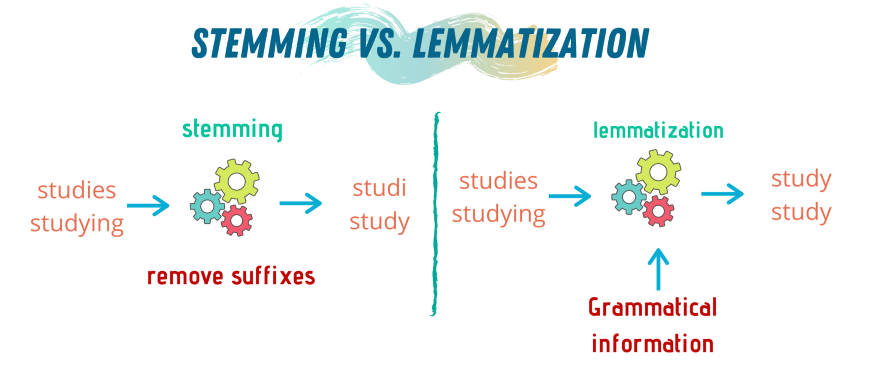

In [18]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [19]:
wnl = WordNetLemmatizer()

df['clean_text_lemmatized'] = df['clean_text_nostopword'].apply(lambda x:' '.join([wnl.lemmatize(i) for i in x]))
df.head()

<ipython-input-19-900b3980fa25>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text_lemmatized'] = df['clean_text_nostopword'].apply(lambda x:' '.join([wnl.lemmatize(i) for i in x]))


,clean_text,category,clean_text_tokenized,clean_text_nostopword,clean_text_lemmatized
0,when modi promised minimum government maximum...,-1.0,"[when, modi, promised, minimum, government, ma...","[modi, promised, minimum, government, maximum,...",modi promised minimum government maximum gover...
1,talk all the nonsense and continue all the dra...,0.0,"[talk, all, the, nonsense, and, continue, all,...","[talk, nonsense, continue, drama, vote, modi, ]",talk nonsense continue drama vote modi
2,what did just say vote for modi welcome bjp t...,1.0,"[what, did, just, say, vote, for, modi, welcom...","[say, vote, modi, welcome, bjp, told, rahul, m...",say vote modi welcome bjp told rahul main camp...
3,asking his supporters prefix chowkidar their n...,1.0,"[asking, his, supporters, prefix, chowkidar, t...","[asking, supporters, prefix, chowkidar, names,...",asking supporter prefix chowkidar name modi gr...
4,answer who among these the most powerful world...,1.0,"[answer, who, among, these, the, most, powerfu...","[answer, among, powerful, world, leader, today...",answer among powerful world leader today trump...


#  **Stemming**

### **Stemming**:Stemming is the process of reducing words to their root form by removing prefixes or suffixes.

In [20]:
from nltk import PorterStemmer

ps = PorterStemmer()

df['clean_text_stem'] = df['clean_text_nostopword'].apply(lambda x: ' '.join([ps.stem(i) for i in x]))
df.head()

<ipython-input-20-1294c47213cb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text_stem'] = df['clean_text_nostopword'].apply(lambda x: ' '.join([ps.stem(i) for i in x]))


,clean_text,category,clean_text_tokenized,clean_text_nostopword,clean_text_lemmatized,clean_text_stem
0,when modi promised minimum government maximum...,-1.0,"[when, modi, promised, minimum, government, ma...","[modi, promised, minimum, government, maximum,...",modi promised minimum government maximum gover...,modi promis minimum govern maximum govern expe...
1,talk all the nonsense and continue all the dra...,0.0,"[talk, all, the, nonsense, and, continue, all,...","[talk, nonsense, continue, drama, vote, modi, ]",talk nonsense continue drama vote modi,talk nonsens continu drama vote modi
2,what did just say vote for modi welcome bjp t...,1.0,"[what, did, just, say, vote, for, modi, welcom...","[say, vote, modi, welcome, bjp, told, rahul, m...",say vote modi welcome bjp told rahul main camp...,say vote modi welcom bjp told rahul main campa...
3,asking his supporters prefix chowkidar their n...,1.0,"[asking, his, supporters, prefix, chowkidar, t...","[asking, supporters, prefix, chowkidar, names,...",asking supporter prefix chowkidar name modi gr...,ask support prefix chowkidar name modi great s...
4,answer who among these the most powerful world...,1.0,"[answer, who, among, these, the, most, powerfu...","[answer, among, powerful, world, leader, today...",answer among powerful world leader today trump...,answer among power world leader today trump pu...


In [21]:
positive_words = [word for word, cat in zip(df['clean_text_nostopword'], df['category']) if cat == 1.0]
negative_words = [word for word, cat in zip(df['clean_text_nostopword'], df['category']) if cat == -1.0]
neutral_words = [word for word, cat in zip(df['clean_text_nostopword'], df['category']) if cat == 0.0]


print('positive_words:',len(positive_words))
print('negative_words:',len(negative_words))
print('neutral_words:',len(neutral_words))

positive_words: 72249
negative_words: 35509
neutral_words: 55211


### The total number of Positive sentiment words were 72249, Negative sentiment words were 35509 & Neutral sentiment words were 55211.






## Data Visualisation

### Using Wordcloud Technique to Visualize positive and negative text.:


In [22]:
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))
image_colors = ImageColorGenerator(Mask)

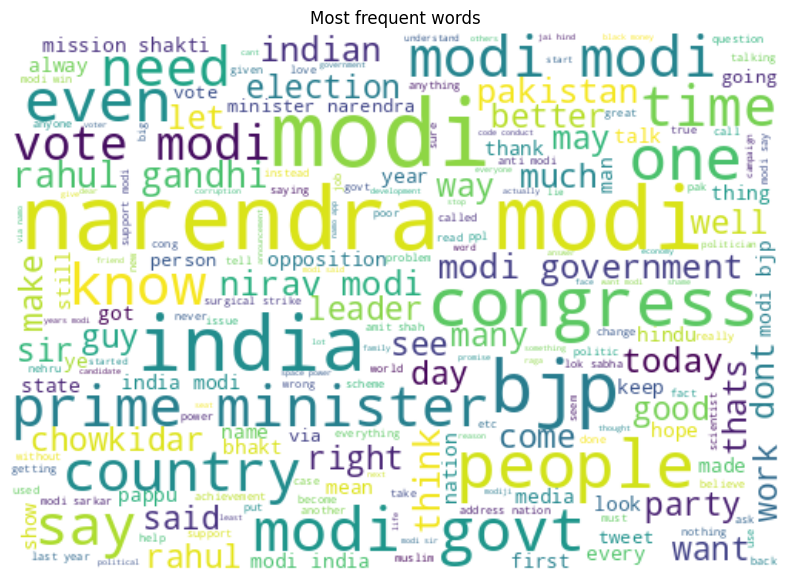

In [23]:
# Flatten the list of lists into a single list of words
all_words = [word for word_list in df['clean_text_nostopword'] for word in word_list]

# Join the words into a single string
frequent_words = ' '.join(all_words)

# Create the word cloud
wordcloud = WordCloud(width=500, height=350, max_font_size=60,
                      background_color='white', colormap='viridis').generate(frequent_words)

# Display the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Most frequent words")
plt.axis('off')
plt.show()


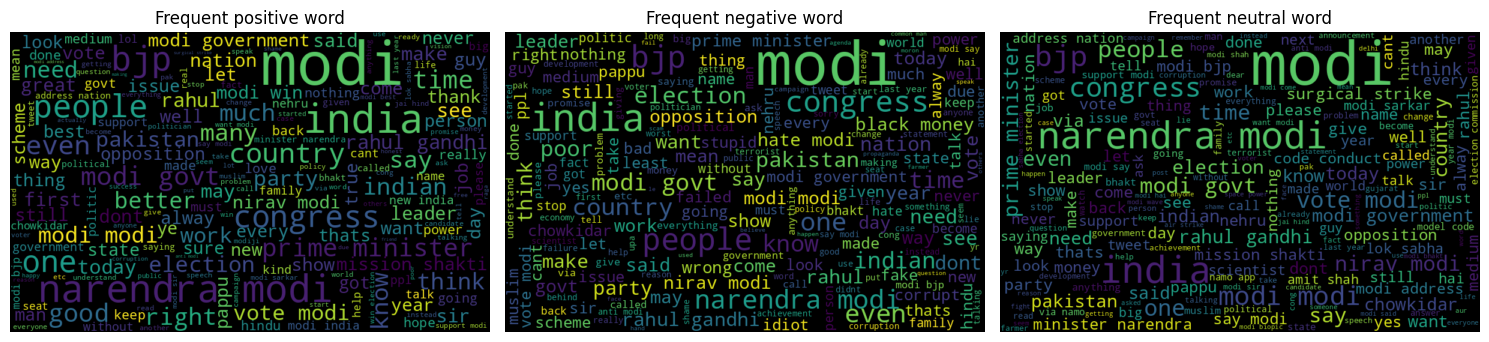

In [24]:
# frequent words visualization
freq_positive_word= " ".join([word for word in df['clean_text_lemmatized'][df['category']==1]])
freq_negative_word= " ".join([word for word in df['clean_text_lemmatized'][df['category']==-1]])
freq_neutral_word= " ".join([word for word in df['clean_text_lemmatized'][df['category']==0]])


positive_wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(freq_positive_word)
negative_wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(freq_negative_word)
neutral_wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(freq_neutral_word)


plt.figure(figsize=(15, 8))
plt.subplot(1, 3, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Frequent positive word')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Frequent negative word')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.title('Frequent neutral word')
plt.axis('off')

plt.tight_layout()
plt.show()

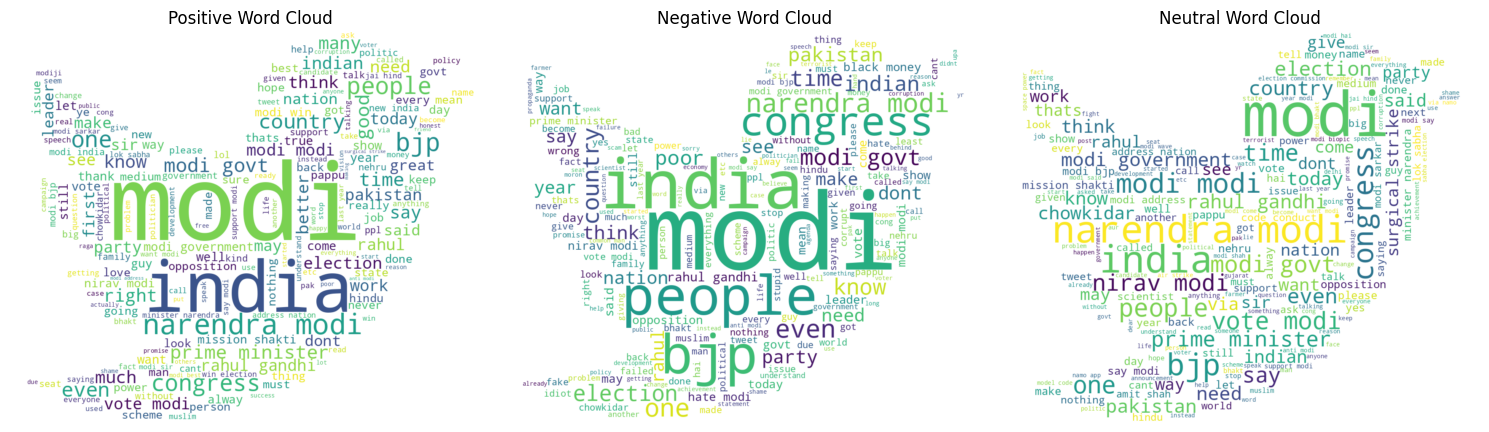

In [25]:
# Extract positive and negative text as single strings
positive_text = ' '.join(df[df['category'] == 1]['clean_text_lemmatized'])
negative_text = ' '.join(df[df['category'] == -1]['clean_text_lemmatized'])
neutral_text = ' '.join(df[df['category'] == 0]['clean_text_lemmatized'])


# Create WordClouds for positive and negative text
positive_wordcloud = WordCloud(width=800, height=400, background_color='white', mask=Mask).generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white', mask=Mask).generate(negative_text)
neutral_wordcloud = WordCloud(width=800, height=400, background_color='white', mask=Mask).generate(neutral_text)


plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Word Cloud')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Word Cloud')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.title('Neutral Word Cloud')
plt.axis('off')

plt.tight_layout()
plt.show()




# **Feature Extraction**

### Convert the text data into numerical features using techniques TF-IDF(Term Frequency-Inverse Document Frequency)


##  **TF (Term Frequency):**




* **Term Frequency measures how often a word appears in a document.**

* **Words that appear more times in a document get higher TF scores**.

*  **It helps identify important words within a document**.




##  **IDF (Inverse Document Frequency):**


  
*   **Inverse Document Frequency measures the importance of a word across all
documents in a collection (corpus).**

*  **Words that are rare across all documents get higher IDF scores.**


* **It helps identify words that are distinctive and not common in all documents.**



##  **TF-IDF (Term Frequency-Inverse Document Frequency):**


* **TF-IDF combines TF and IDF to determine the importance of a word in a specific document compared to its importance across all documents in the corpus ,It assigns higher values to words that are important within a specific document but not common across all documents**

* **TF-IDF helps in text analysis, information retrieval, and text classification by identifying the significance of words in a document,In simpler terms, TF-IDF is a way to give more weight to words that are important in a single document but not very common in all documents. It helps in extracting meaningful information from text data for various natural language processing tasks**



.







###  **This is the formula of TF-IDF (Term Frequency-Inverse Document Frequency)**
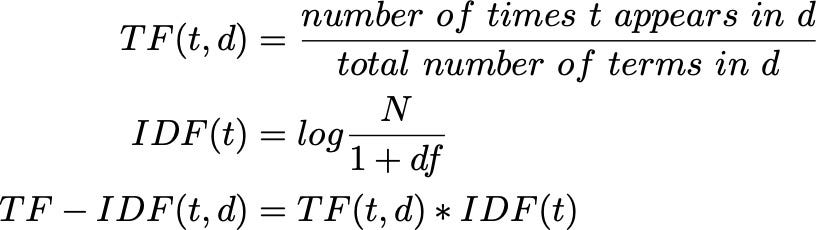

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
tf_wb= TfidfVectorizer(max_features=1000)
X_tf = tf_wb.fit_transform(df['clean_text_lemmatized'])
X_tf = X_tf.toarray()

In [27]:

X_tf.shape

(162969, 1000)

In [28]:

X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X_tf, df['category'].values, test_size=0.33,random_state = 27)

In [29]:
from sklearn.naive_bayes import MultinomialNB
classfier_tf = MultinomialNB(alpha=0.1)
# Fitting data
classfier_tf.fit(X_train_tf,y_train_tf)
# Prediction on test data
Y_pred_tf = classfier_tf.predict(X_test_tf)

acc1=accuracy_score(y_test_tf, Y_pred_tf)
print("multinomial Naive Bayes model accuracy (in %):",acc1*100 )

multinomial Naive Bayes model accuracy (in %): 68.68724432874674


In [30]:
print(classification_report(y_test_tf, Y_pred_tf))

              precision    recall  f1-score   support

        -1.0       0.85      0.35      0.50     11690
         0.0       0.71      0.66      0.69     18061
         1.0       0.65      0.87      0.74     24029

    accuracy                           0.69     53780
   macro avg       0.74      0.63      0.64     53780
weighted avg       0.71      0.69      0.67     53780



## **Gaussian Naive Bayes**

In [31]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train_tf, y_train_tf)
NB_pred= NB.predict(X_test_tf)

acc1=accuracy_score(y_test_tf, NB_pred)
print("Gaussian Naive Bayes model accuracy (in %):",acc1*100 )

Gaussian Naive Bayes model accuracy (in %): 71.23280029750838


In [32]:
print(classification_report(y_test_tf, NB_pred))


              precision    recall  f1-score   support

        -1.0       0.58      0.56      0.57     11690
         0.0       0.65      0.95      0.78     18061
         1.0       0.90      0.60      0.72     24029

    accuracy                           0.71     53780
   macro avg       0.71      0.71      0.69     53780
weighted avg       0.75      0.71      0.71     53780



## **Random Forest Classifier**

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

rfc= RandomForestClassifier()
rfc.fit(X_train_tf, y_train_tf)

rfc_pred = rfc.predict(X_test_tf)

acc2=accuracy_score(y_test_tf, rfc_pred)
print("Random Forest Classifier model accuracy (in %):",acc2*100)
print(classification_report(y_test_tf, rfc_pred))

Random Forest Classifier model accuracy (in %): 79.14838229825214
              precision    recall  f1-score   support

        -1.0       0.81      0.58      0.67     11690
         0.0       0.72      0.93      0.81     18061
         1.0       0.86      0.79      0.83     24029

    accuracy                           0.79     53780
   macro avg       0.80      0.77      0.77     53780
weighted avg       0.80      0.79      0.79     53780



In [34]:
from collections import Counter
Counter(y_train_tf)


Counter({0.0: 37150, 1.0: 48220, -1.0: 23819})

###  **we can see imbalance data**

##  **SMOTE (Synthetic Minority Over-sampling Technique)for Imbalanced Classification**

In [35]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tf, y_train_tf)

In [40]:
nb = GaussianNB()
nb.fit(X_train_resampled, y_train_resampled)
nb_pred= nb.predict(X_test_tf)

acc3=accuracy_score(y_test_tf, nb_pred)
print(" Multinomial Naive Bayes  model accuracy (in %):",acc3*100 )

 Multinomial Naive Bayes  model accuracy (in %): 72.19784306433618


In [41]:
print(classification_report(y_test_tf, nb_pred))

              precision    recall  f1-score   support

        -1.0       0.62      0.51      0.56     11690
         0.0       0.66      0.95      0.78     18061
         1.0       0.87      0.65      0.74     24029

    accuracy                           0.72     53780
   macro avg       0.72      0.71      0.69     53780
weighted avg       0.74      0.72      0.72     53780



In [37]:
from sklearn.naive_bayes import MultinomialNB
classfier_tf = MultinomialNB(alpha=0.1)
# Fitting data
classfier_tf.fit(X_train_resampled,y_train_resampled)
# Prediction on test data
Y_pred_tf = classfier_tf.predict(X_test_tf)

acc1=accuracy_score(y_test_tf, Y_pred_tf)
print("Gaussian Naive Bayes model accuracy (in %):",acc1*100 )

Gaussian Naive Bayes model accuracy (in %): 71.49683897359613


In [42]:
print(classification_report(y_test_tf, Y_pred_tf))

              precision    recall  f1-score   support

        -1.0       0.53      0.68      0.60     11690
         0.0       0.71      0.77      0.74     18061
         1.0       0.86      0.69      0.77     24029

    accuracy                           0.71     53780
   macro avg       0.70      0.71      0.70     53780
weighted avg       0.74      0.71      0.72     53780



###  **Before fixing the class imbalance issue, Multinomial Naive Bayes had an accuracy of 68%, while Gaussian Naive Bayes had 71%. But after balancing the data, Multinomial Naive Bayes improved to 71%, and Gaussian Naive Bayes to 72%. This emphasizes the importance of balancing data for better model performance.**

### **Due to runtime limitations, we restricted the model to use a maximum of 1000 features. If not for this limitation, it could potentially achieve even higher accuracy.**